In [2]:
import uproot
import lazypredict

from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file = uproot.open("pfClusters_tree_noPU_testing.root")

In [3]:
events = file["een_analyzer/PfTree"]


In [4]:
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nClus                | int32_t                  | AsDtype('>i4')
clusrawE             | float                    | AsDtype('>f4')
cluscorrE            | float                    | AsDtype('>f4')
clusPt               | float                    | AsDtype('>f4')
clusEta              | float                    | AsDtype('>f4')
clusRho              | float                    | AsDtype('>f4')
clusPhi              | float                    | AsDtype('>f4')
clusLayer            | float                    | AsDtype('>f4')
clusSize             | int32_t                  | AsDtype('>i4')
clusIetaIx           | int32_t                  | AsDtype('>i4')
clusIphiIy           | int32_t                  | AsDtype('>i4')
clusPS1              | float                    | AsDtype('>f4')
clusPS2              | float                    | AsDtype(

In [5]:
tgtvar = events.arrays("tgtvar", library = "pd")
tgtvar = tgtvar[:10000]



clusrawE = events.arrays("clusrawE", library = "pd")
genEnergy = events.arrays("genEnergy", library = "pd")
tv = np.divide(clusrawE,genEnergy)

tv = tv[:100]


In [6]:
regVarsEB = events.arrays(["clusrawE", "clusIetaIx", "clusIphiIy", "ietamod20", "iphimod20", "nhits_mod"], library = "pd")

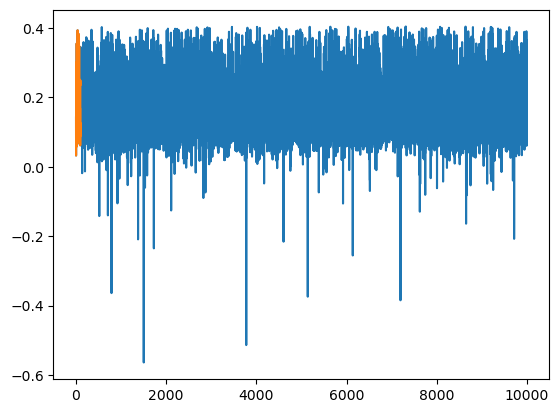

In [7]:
plt.plot(tgtvar)
plt.plot(np.log(1/tv))

In [8]:
tv

,clusrawE
0,0.87
1,0.97
2,0.88
3,0.82
4,0.84
...,...
95,0.90
96,0.83
97,0.78
98,0.78


In [9]:
regVarsEB = regVarsEB[:10000]
tgtvar = tgtvar[:10000]

In [10]:
regVarsEB

,clusrawE,clusIetaIx,clusIphiIy,ietamod20,iphimod20,nhits_mod
0,4.53,14,200,13,19,0
1,11.94,74,8,8,7,0
2,10.81,27,93,1,12,0
3,3.18,72,206,6,5,0
4,3.24,-71,26,-5,5,0
...,...,...,...,...,...,...
9995,19.76,83,188,17,7,3
9996,55.67,59,41,13,0,0
9997,8.79,-30,157,-4,16,0
9998,8.72,28,336,2,15,0


In [ ]:
X = regVarsEB
y = tgtvar
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 19%|███████████████▊                                                                   | 8/42 [00:03<00:07,  4.52it/s]

ElasticNetCV model failed to execute
Gram matrix passed in via 'precompute' parameter did not pass validation when a single element was checked - please check that it was computed properly. For element (3,4) we computed 91.17805480957031 but the user-supplied value was 91.17810821533203.


 21%|█████████████████▊                                                                 | 9/42 [00:10<01:12,  2.18s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 48%|███████████████████████████████████████                                           | 20/42 [02:39<01:32,  4.21s/it]

LassoCV model failed to execute
Gram matrix passed in via 'precompute' parameter did not pass validation when a single element was checked - please check that it was computed properly. For element (3,4) we computed 91.17805480957031 but the user-supplied value was 91.17810821533203.


 71%|██████████████████████████████████████████████████████████▌                       | 30/42 [03:11<00:36,  3.04s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
